In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import random as random
import sqlite3
import seaborn as sns


In [2]:
input_csv = pd.read_csv('cleaned_2011.csv')

# # conn = sqlite3.connect('database.sqlite')

# # df = pd.read_sql_query("SELECT * FROM loan where loan_status is not null",conn)

# input_csv=df

In [3]:
input_csv

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,emp__8 years,emp__9 years,emp__< 1 year,ho__MORTGAGE,ho__OTHER,ho__OWN,ho__RENT,ver__Not Verified,ver__Source Verified,ver__Verified
0,5000,5000,4975.00000,10.65,162.87,24000.0,Fully Paid,27.65,0,1,...,0,0,0,0,0,0,1,0,0,1
1,2500,2500,2500.00000,15.27,59.83,30000.0,Charged Off,1.00,0,5,...,0,0,1,0,0,0,1,0,1,0
2,2400,2400,2400.00000,15.96,84.33,12252.0,Fully Paid,8.72,0,2,...,0,0,0,0,0,0,1,1,0,0
3,10000,10000,10000.00000,13.49,339.31,49200.0,Fully Paid,20.00,0,1,...,0,0,0,0,0,0,1,0,1,0
4,3000,3000,3000.00000,12.69,67.79,80000.0,Current,17.94,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21716,24250,18875,18850.00000,17.43,473.47,48000.0,Fully Paid,16.35,0,1,...,0,0,0,0,0,1,0,0,0,1
21717,12000,12000,10958.17650,5.42,361.92,19008.0,Fully Paid,7.70,0,0,...,0,0,0,0,0,1,0,1,0,0
21718,12000,12000,11925.00000,9.99,254.91,18000.0,Fully Paid,3.33,0,0,...,0,0,0,0,0,1,0,0,1,0
21719,2500,2500,2500.00000,5.79,75.82,40000.0,Charged Off,14.70,0,1,...,1,0,0,0,0,0,1,1,0,0


In [4]:
x_count = 0

input_csv['del_amt'] = [0 for x in input_csv['installment']]

input_csv['installment'].iloc[0]

for x in input_csv['installment']:
    input_csv['del_amt'].iloc[x_count] = x*input_csv['delinq_2yrs'].iloc[x_count]
    if x_count >= 1000:
        if x_count%10000 == 0:
            print(x_count)
    x_count+=1
    

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


10000
20000


In [6]:
scatter_df = input_csv[input_csv.del_amt > 0]

scatter_df_high = scatter_df[scatter_df.delinq_2yrs > 2]

scatter_df_low = scatter_df[scatter_df.delinq_2yrs <= 2]

scatter_df_median_low = scatter_df[scatter_df.del_amt <= scatter_df.del_amt.median()]

scatter_df_median_high = scatter_df[scatter_df.del_amt > scatter_df.del_amt.median()]

The r-squared is: 0.2963332172788801


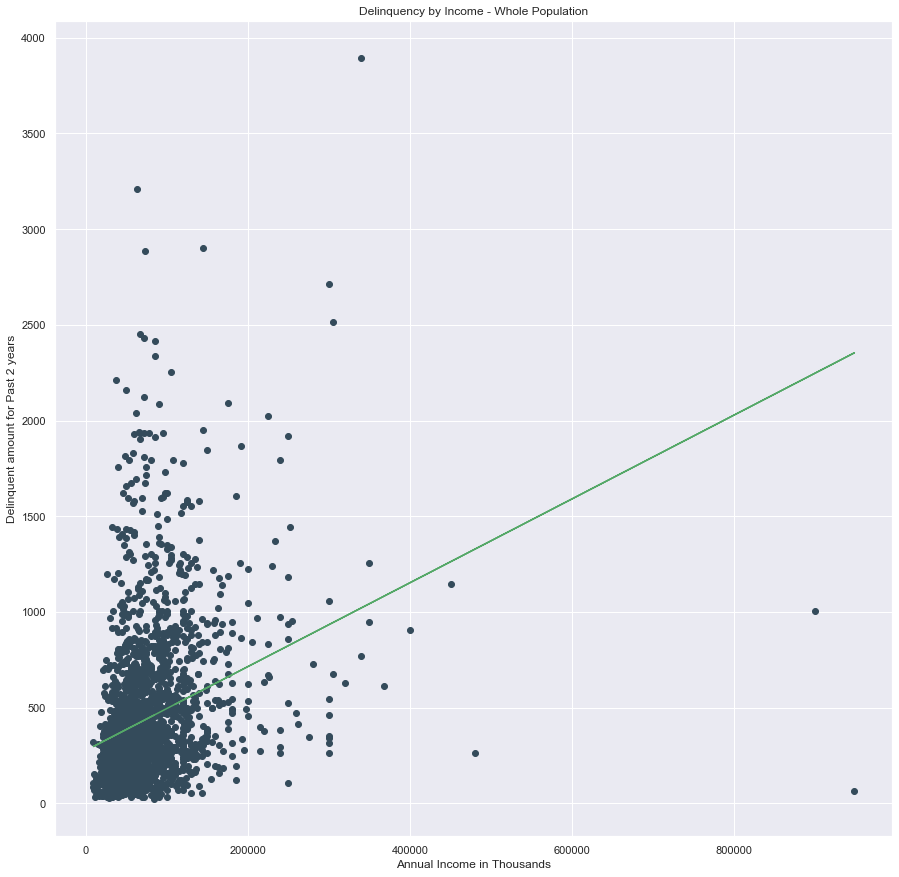

In [115]:
x_values = scatter_df['annual_inc'].to_list()
y_values = scatter_df['del_amt'].to_list()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Y_ticks = np.arange(0, 4000, 200)

# plt.yticks(Y_ticks)                

regress_values = [x * slope + intercept for x in x_values]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
sns.set(palette="Blues_d")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"g-")
plt.xlabel('Annual Income in Thousands')
plt.ylabel('Delinquent amount for Past 2 years')
plt.title('Delinquency by Income - Whole Population')


print(f"The r-squared is: {rvalue}")

fig = plt.gcf()
fig.set_size_inches(15, 15)

#plt.savefig('temp_north_lat.png')

plt.show()

The r-squared is: 0.39077548800162437


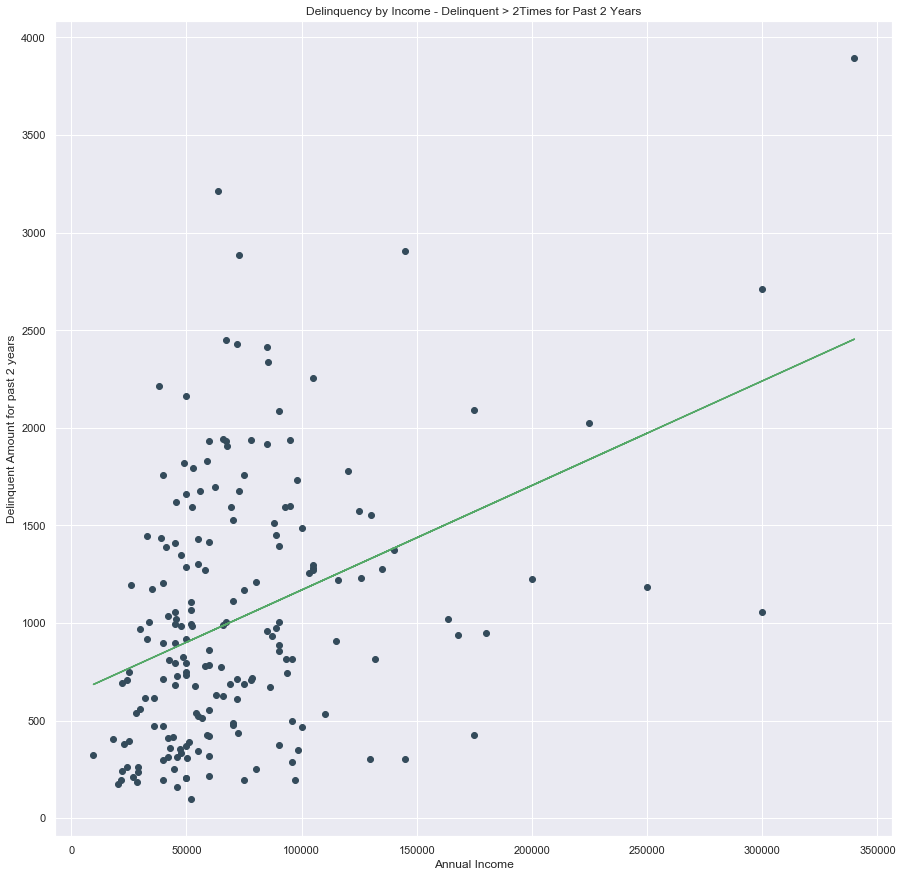

In [116]:
x_values = scatter_df_high['annual_inc'].to_list()
y_values = scatter_df_high['del_amt'].to_list()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = [x * slope + intercept for x in x_values]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
sns.set(palette="Blues_d")
plt.plot(x_values,regress_values,"g-")
plt.xlabel('Annual Income')
plt.ylabel('Delinquent Amount for past 2 years')
plt.title('Delinquency by Income - Delinquent > 2Times for Past 2 Years')
print(f"The r-squared is: {rvalue}")

fig = plt.gcf()
fig.set_size_inches(15, 15)

#plt.savefig('temp_north_lat.png')

plt.show()

The r-squared is: 0.42747431889093457


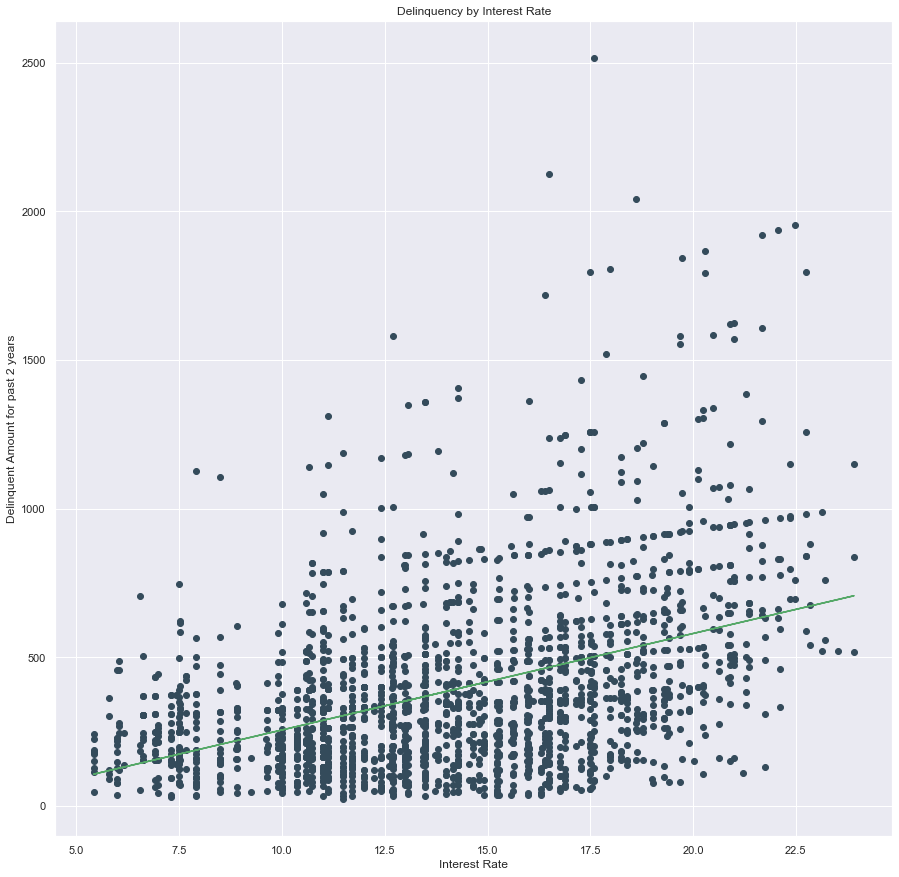

In [117]:
x_values = scatter_df_low['int_rate'].to_list()
y_values = scatter_df_low['del_amt'].to_list()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = [x * slope + intercept for x in x_values]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
sns.set(palette="Blues_d")
plt.plot(x_values,regress_values,"g-")
plt.xlabel('Interest Rate')
plt.ylabel('Delinquent Amount for past 2 years')
plt.title('Delinquency by Interest Rate')
print(f"The r-squared is: {rvalue}")

fig = plt.gcf()
fig.set_size_inches(15, 15)

#plt.savefig('temp_north_lat.png')

plt.show()

The r-squared is: 0.41851649896147847


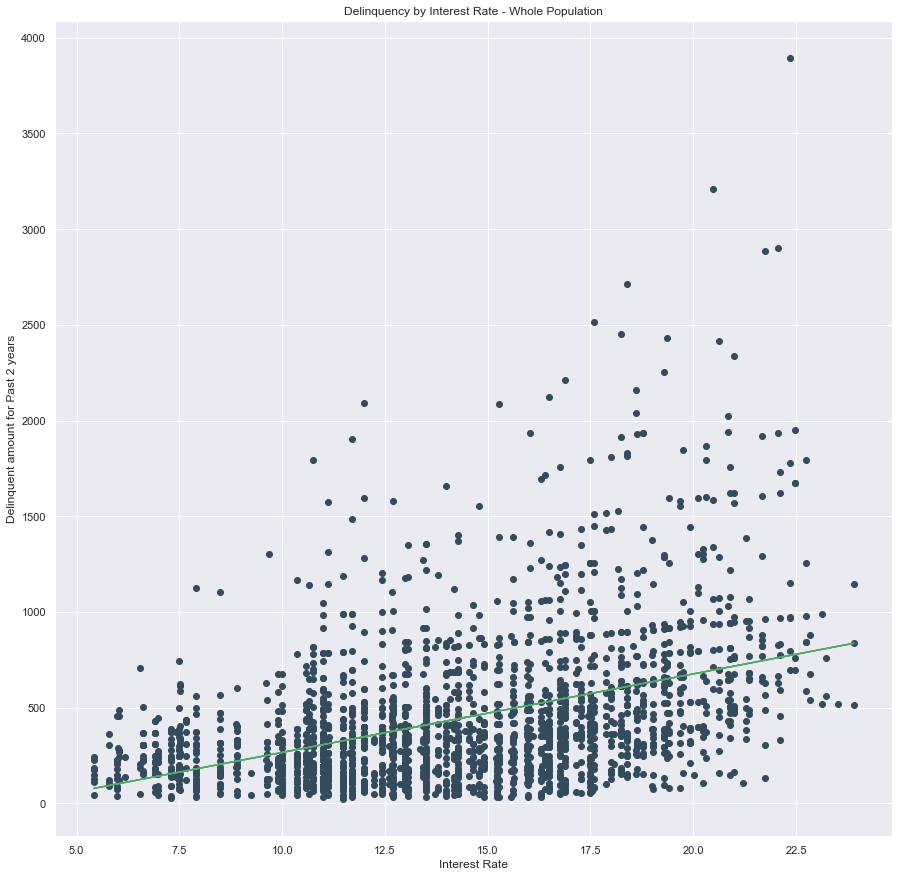

In [118]:
x_values = scatter_df['int_rate'].to_list()
y_values = scatter_df['del_amt'].to_list()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Y_ticks = np.arange(0, 4000, 200)

# plt.yticks(Y_ticks)

regress_values = [x * slope + intercept for x in x_values]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
sns.set(palette="Blues_d")
plt.plot(x_values,regress_values,"g-")
plt.xlabel('Interest Rate')
plt.ylabel('Delinquent amount for Past 2 years')
plt.title('Delinquency by Interest Rate - Whole Population')
print(f"The r-squared is: {rvalue}")

fig = plt.gcf()
fig.set_size_inches(15, 15)

#plt.savefig('temp_north_lat.png')

plt.show()

The r-squared is: 0.7140234356057846


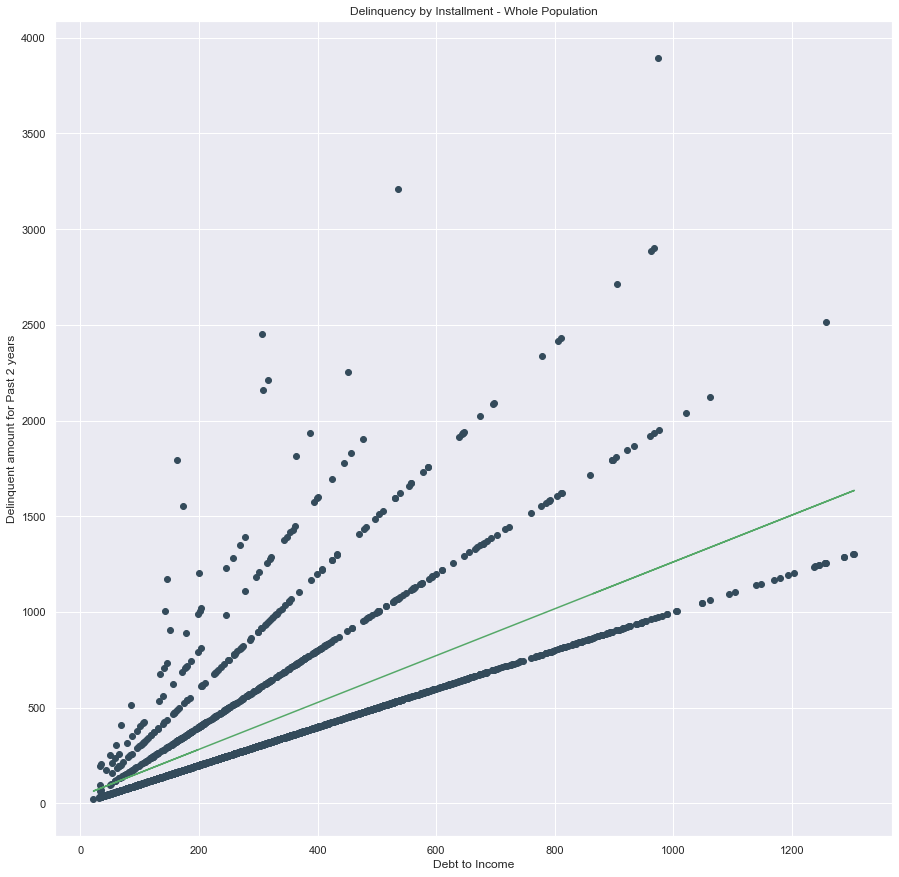

In [119]:
x_values = scatter_df['installment'].to_list()
y_values = scatter_df['del_amt'].to_list()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Y_ticks = np.arange(0, 4000, 200)

# plt.yticks(Y_ticks)

regress_values = [x * slope + intercept for x in x_values]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
sns.set(palette="Blues_d")
plt.plot(x_values,regress_values,"g-")
plt.xlabel('Debt to Income')
plt.ylabel('Delinquent amount for Past 2 years')
plt.title('Delinquency by Installment - Whole Population')
print(f"The r-squared is: {rvalue}")

fig = plt.gcf()
fig.set_size_inches(15, 15)

#plt.savefig('temp_north_lat.png')

plt.show()


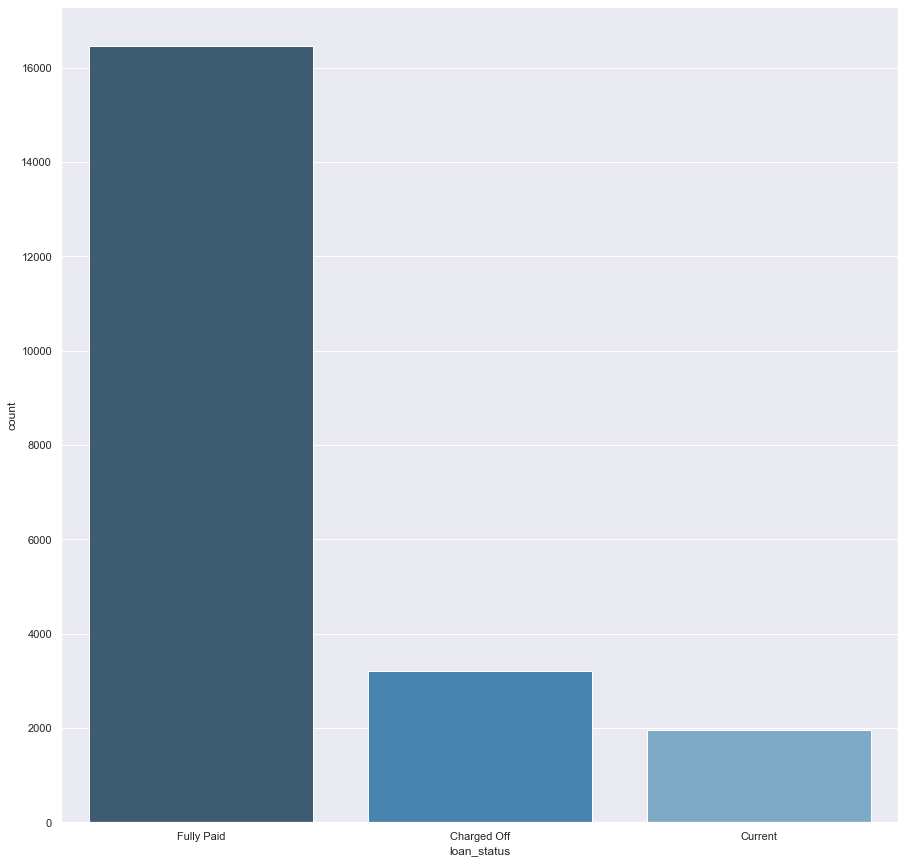

In [99]:
x = input_csv[input_csv.loan_status != 'Default']

x = x[x.loan_status != 'In Grace Period']

x = x[x.loan_status != 'Late (16-30 days)']

x = x[x.loan_status != 'Late (31-120 days)']

x = x['loan_status']

sns.set(style="darkgrid")

sns.countplot(x,palette="Blues_d")

fig = plt.gcf()
fig.set_size_inches(15, 15)

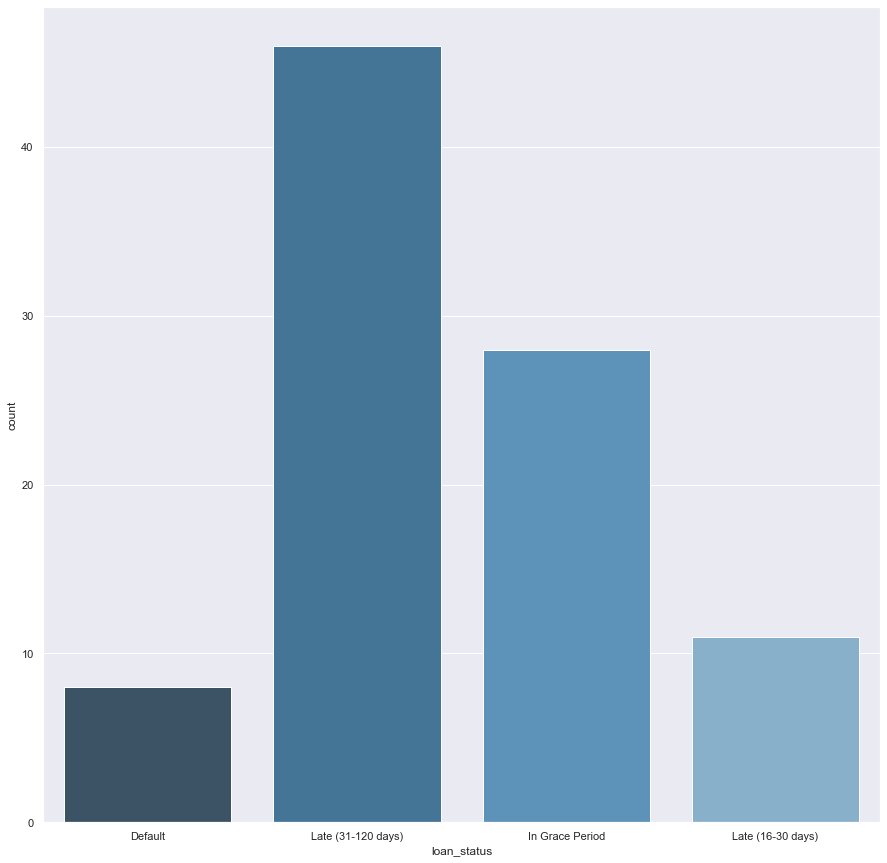

In [79]:
x = input_csv[input_csv.loan_status != 'Fully Paid']

x = x[x.loan_status != 'Charged Off']

x = x[x.loan_status != 'Current']

x = x['loan_status']

sns.set(style="darkgrid")

sns.countplot(x,palette="Blues_d")

fig = plt.gcf()
fig.set_size_inches(15, 15)


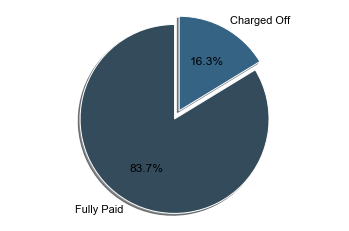

In [126]:
labels = 'Fully Paid','Charged Off'

x_list = input_csv[input_csv.loan_status == 'Fully Paid']

x = x_list['loan_status'].count()

y_list = input_csv[input_csv.loan_status == 'Charged Off']

y = y_list['loan_status'].count()

sns.set(palette="Blues_d")

sizes = [x,y]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, textprops={'color':"black"})

#
ax1.axis('equal')

plt.show()



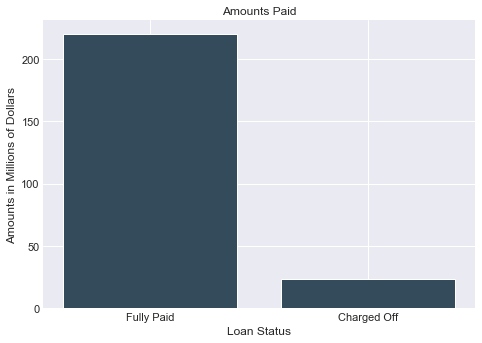

In [130]:
labels = 'Fully Paid','Charged Off'

x_list = input_csv[input_csv.loan_status == 'Fully Paid']

x = x_list['total_pymnt'].sum()/1000000

y_list = input_csv[input_csv.loan_status == 'Charged Off']

y = y_list['total_pymnt'].sum()/1000000

fig = plt.figure() 
plt.style.use('seaborn-darkgrid') 
ax = fig.add_axes([0,0,1,1]) 
Loan_Status = ['Fully Paid', 'Charged Off'] 
sns.set(palette="Blues_d")
Amount = [x,y]
ax.bar(Loan_Status,Amount) 
plt.xlabel('Loan Status') 
plt.ylabel('Amounts in Millions of Dollars') 
plt.title('Amounts Paid')

plt.show()